<h1><center>Global Warming Analysis</center></h1>

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

%matplotlib inline

# Part 1: Analyzing global temperature anomalies

A temperature anomaly is a departure from the long term average temperature value. The goal is to analyze anomalies in the global temperature over time. Dataset used: https://data.giss.nasa.gov/gistemp/

In [99]:
anomalies = pd.read_csv("Data/GLB.Ts+dSST.csv", skiprows=[0]) # Skip the first row

In [100]:
anomalies = anomalies[["Year","J-D"]] # We only want the relevant columns, which are year and Yearly Average
anomalies.rename(columns={'J-D': 'AvgTemp'}, inplace=True) 
anomalies = anomalies.replace('***', np.NAN) # The 2018 value is ***, we would like to replace it with NaN and drop the row
anomalies['AvgTemp'] = pd.to_numeric(anomalies['AvgTemp']) # The AvgTemp column is a string, needs to be float
anomalies.dropna(inplace=True)
# anomalies.dtypes

In [101]:
anomalies.tail()

,Year,AvgTemp
133,2013,0.65
134,2014,0.74
135,2015,0.87
136,2016,1.00
137,2017,0.90


In [102]:
#Matplotlib plotting
#plt.figure(figsize=(15,8))
#plt.plot(anomalies['Year'], anomalies['AvgTemp'], marker='o')
#plt.title('Global Temparature anomalies vs Year')
#plt.xlabel('Year')
#plt.ylabel('Temperature Anomalies')
#plt.show()

trace0 = go.Scatter(x = anomalies['Year'], y = anomalies['AvgTemp'], mode = 'lines+markers')
layout = go.Layout(
    title='Global Temparature anomalies vs Year',
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Temperature Anomalies',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=[trace0], layout=layout)
py.iplot(fig)

As we can see, the global temperature anomalies suggest negative anomalies between 1880 to the 1940's, suggesting a cooling period. The anomalies are fairly stable between 1940's to 1970's, and after we see a consistent rapid increase in anomalies, suggesting that the planet is warming at an alarming pace.

## Part 2: Predicting future temperature anomalies

Now I will try to predict future temperature anomalies using **linear regression**. Since the temperature anomalies started the upward trend after 1960, I will only be using data from 1960 onwards.

In [103]:
anomalies_filtered = anomalies[anomalies.Year > 1960] 

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [105]:
#X = anomalies_filtered[['Year']] # Needs to be 2D
X = anomalies_filtered.as_matrix(['Year'])
#y = anomalies_filtered['AvgTemp']
y = anomalies_filtered.as_matrix(['AvgTemp']) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training, 20% testing split

In [106]:
lr = LinearRegression()

In [107]:
lr.fit(X_train,y_train) # Fit the model on the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [108]:
print('Score :' ,lr.score(X_test,y_test)) # Score on test data, showing a significant relationship

Score : 0.8638781155281497


In [109]:
x_line = np.arange(1960,2100).reshape(-1,1) # Graph has to be from 1960 to 2100
p = lr.predict(x_line).T # Transpose so we have same dimensions, predict anomalies

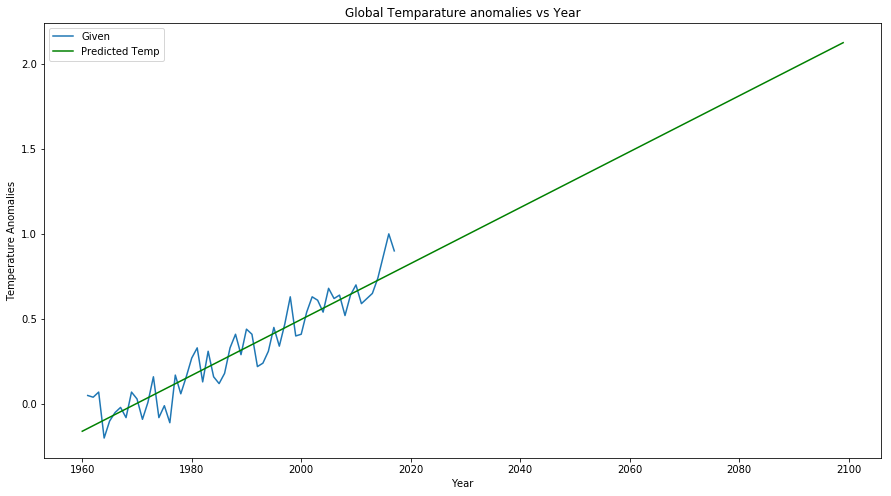

In [110]:
plt.figure(figsize=(15,8))
plt.plot(anomalies_filtered['Year'],anomalies_filtered['AvgTemp'],label='Given')
plt.plot(x_line,p[0],color='green',label='Predicted Temp')
plt.title('Global Temparature anomalies vs Year')
plt.xlabel('Year')
plt.ylabel('Temperature Anomalies')
plt.legend()

In [111]:
lr.predict(2100) # Temperature anomaly in the year 2100

array([[2.1401674]])

## Conclusion
It looks like the temperature anomaly in the year 2100 will reach 2.1&deg;. We are currently seeing the effects of a 1&deg; temperature anomaly in the form of extreme weather: Forest fires, droughts, floods, etc. A 2.1&deg; temperature anomaly will magnify this extreme weather to catastrophic levels. 

Considering some major countries are moving backwards when it comes to greenhouse gases and clean energy, and also considering the fact that climate is changing faster than scientists predicted, it's safe to say that a 2.1&deg; anomaly in the year 2100 is a very conservative prediction.

### Aside: Canadian global warming visualization

I would like to see the average Canadian temperature over time, as well as Toronto's.

Data used: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

In [112]:
avg_can = pd.read_csv("Data/GlobalLandTemperaturesByCountry.csv")
avg_tor = pd.read_csv("Data/GlobalLandTemperaturesByMajorCity.csv")

In [113]:
avg_can['dt'] = pd.to_datetime(avg_can['dt'])
#avg_can['year'] = avg_can.dt.dt.to_period('Y')
#avg_can['year'] = pd.to_numeric(avg_can['year'])
#avg_can['year'] = pd.to_datetime(avg_can['year'])
avg_can = avg_can[(avg_can['Country'] == 'Canada')]
#avg_can = avg_can[(avg_can['Country'] == 'Canada') & (avg_can['year'] > 1820)]
avg_can = avg_can[['dt', 'AverageTemperature']]
avg_can.dropna(inplace=True)

In [114]:
avg_can.dtypes

dt                    datetime64[ns]
AverageTemperature           float64
dtype: object

The Canadian average temperatures were pretty wonky before the 1850s (possibly due to inaccuries and uncertainty), and there is a lot of missing data for those years, so I am only going to look at data after 1830.

In [115]:
import dateutil.parser
avg_can['dt'] = avg_can[avg_can['dt'] > dateutil.parser.parse("1830-01-01")]
avg_can = avg_can[avg_can.dt.notnull()]
########avg_can.set_index(avg_can["dt"],inplace=True)
#######avg_can = avg_can[['AverageTemperature']]
#avg_can[avg_can['dt'] > dateutil.parser.parse("1830-01-01")]
avg_can.head()

,dt,AverageTemperature
97992,1830-02-01 00:00:00,-19.766
97993,1830-03-01 00:00:00,-16.231
97994,1830-04-01 00:00:00,-5.474
97995,1830-05-01 00:00:00,0.606
97996,1830-06-01 00:00:00,8.166


In [116]:
#a = avg_can['AverageTemperature'].resample('A', on='dt').mean()
a = avg_can.resample('A', on='dt').mean() # I am only interested in yearly data, not monthly, so I averaged the data per year
a.dropna(inplace=True)

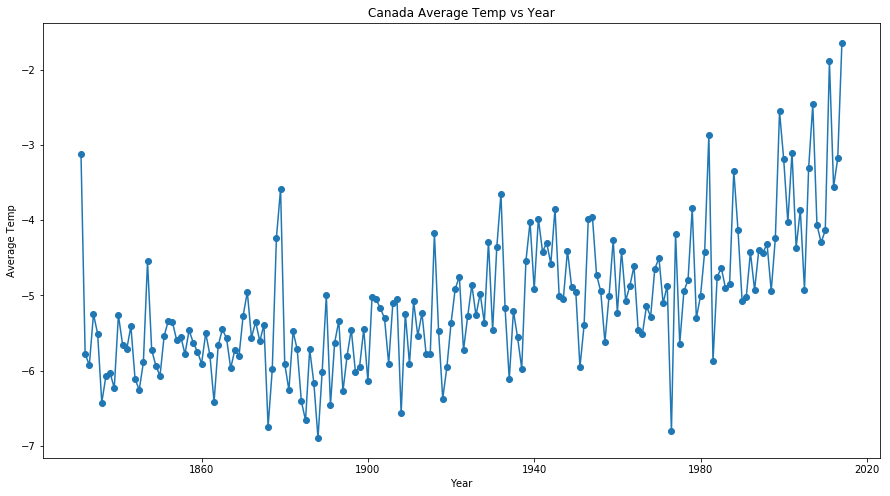

In [117]:
plt.figure(figsize=(15,8))
#plt.plot(avg_can['dt'], avg_can['AverageTemperature'], marker='o')
plt.plot(a, marker='o')
plt.title('Canada Average Temp vs Year')
plt.xlabel('Year')
plt.ylabel('Average Temp')
plt.show()

The average temperatures fluctuates steadily showing a slight increase in the average temperatures starting from the 1900's, and a steady increase from the 1960's. Therefore, similar to before, I am only analyzing from 1960 for regression.

In [118]:
a['dt'] = a.index
a['year'] = a['dt'].dt.year
a_filtered = a[a['year'] > 1960]

In [119]:
#X_can = a.as_matrix(['dt'])
X_can = a_filtered.as_matrix(['year'])
y_can = a_filtered.as_matrix(['AverageTemperature'])
X_can_train, X_can_test, y_can_train, y_can_test = train_test_split(X_can, y_can, test_size=0.2) # 80% training, 20% testing split

In [120]:
lr_can = LinearRegression()
lr_can.fit(X_can_train, y_can_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
print('Score :' ,lr_can.score(X_can_test,y_can_test)) #Because of high variance, R^2 is low

Accuracy : 0.42645021428875873


In [96]:
x_can_line = np.arange(1960,2100).reshape(-1,1) # Graph has to be from 1960 to 2100
p_can = lr_can.predict(x_can_line).T # Transpose so we have same dimensions, predict anomalies

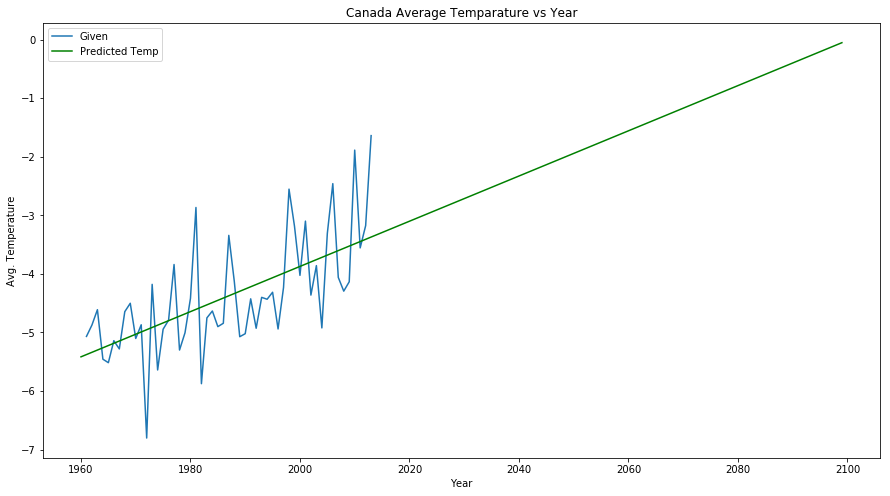

In [141]:
plt.figure(figsize=(15,8))
plt.plot(a_filtered['year'],a_filtered['AverageTemperature'],label='Given')
plt.plot(x_can_line,p_can[0],color='green',label='Predicted Temp')
plt.title('Canada Average Temparature vs Year')
plt.xlabel('Year')
plt.ylabel('Avg. Temperature')
plt.legend()

In [123]:
avg_tor['dt'] = pd.to_datetime(avg_tor['dt'])
#avg_can['year'] = avg_can.dt.dt.to_period('Y')
#avg_can['year'] = pd.to_numeric(avg_can['year'])
#avg_can['year'] = pd.to_datetime(avg_can['year'])
avg_tor = avg_tor[(avg_tor['City'] == 'Toronto')]
#avg_can = avg_can[(avg_can['Country'] == 'Canada') & (avg_can['year'] > 1820)]
avg_tor = avg_tor[['dt', 'AverageTemperature']]
avg_tor.dropna(inplace=True)

In [124]:
avg_tor.dtypes

dt                    datetime64[ns]
AverageTemperature           float64
dtype: object

In [130]:
avg_tor['dt'] = avg_tor[avg_tor['dt'] > dateutil.parser.parse("1830-01-01")]
avg_tor = avg_tor[avg_tor.dt.notnull()]
########avg_can.set_index(avg_can["dt"],inplace=True)
#######avg_can = avg_can[['AverageTemperature']]
#avg_can[avg_can['dt'] > dateutil.parser.parse("1830-01-01")]
avg_tor.head()

,dt,AverageTemperature
230725,1830-02-01 00:00:00,-6.581
230726,1830-03-01 00:00:00,-1.733
230727,1830-04-01 00:00:00,7.378
230728,1830-05-01 00:00:00,9.834
230729,1830-06-01 00:00:00,14.683


In [131]:
#a = avg_can['AverageTemperature'].resample('A', on='dt').mean()
b = avg_tor.resample('A', on='dt').mean()
b.dropna(inplace=True)

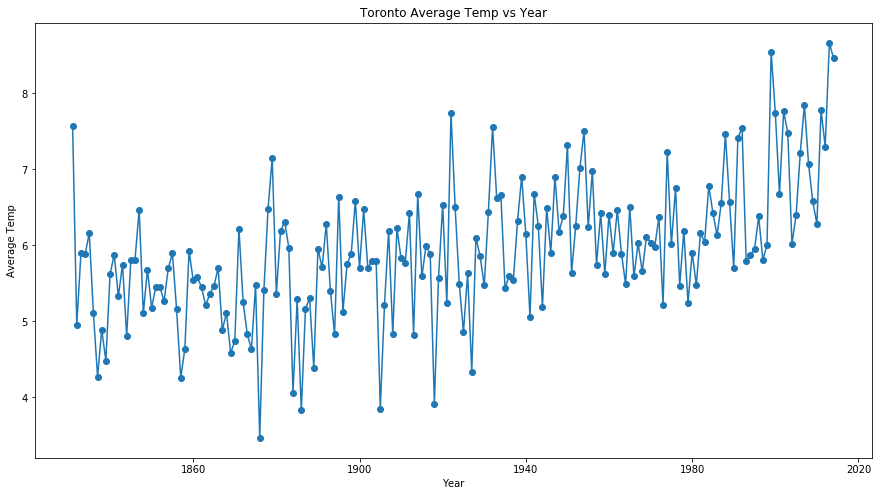

In [132]:
plt.figure(figsize=(15,8))
#plt.plot(avg_can['dt'], avg_can['AverageTemperature'], marker='o')
plt.plot(b, marker='o')
plt.title('Toronto Average Temp vs Year')
plt.xlabel('Year')
plt.ylabel('Average Temp')
plt.show()

The average temperatures fluctuates steadily showing a slight increase in the average temperatures starting from the 1900's, and a steady increase from the 1960's

In [133]:
b['dt'] = b.index
b['year'] = b['dt'].dt.year
#a_filtered = a[a['year'] > 1880]
b_filtered = b[b['year'] > 1960]

In [134]:
#X_can = a.as_matrix(['dt'])
X_tor = b_filtered.as_matrix(['year'])
y_tor = b_filtered.as_matrix(['AverageTemperature'])
X_tor_train, X_tor_test, y_tor_train, y_tor_test = train_test_split(X_tor, y_tor, test_size=0.2) # 80% training, 20% testing split

In [135]:
lr_tor = LinearRegression()
lr_tor.fit(X_tor_train, y_tor_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [136]:
print('Score :' ,lr_tor.score(X_tor_test,y_tor_test)) #Because of high variance, R^2 is low

Score : 0.4228701574709933


In [139]:
x_tor_line = np.arange(1960,2100).reshape(-1,1) # Graph has to be from 1960 to 2100
p_tor = lr_tor.predict(x_tor_line).T # Transpose so we have same dimensions, predict anomalies

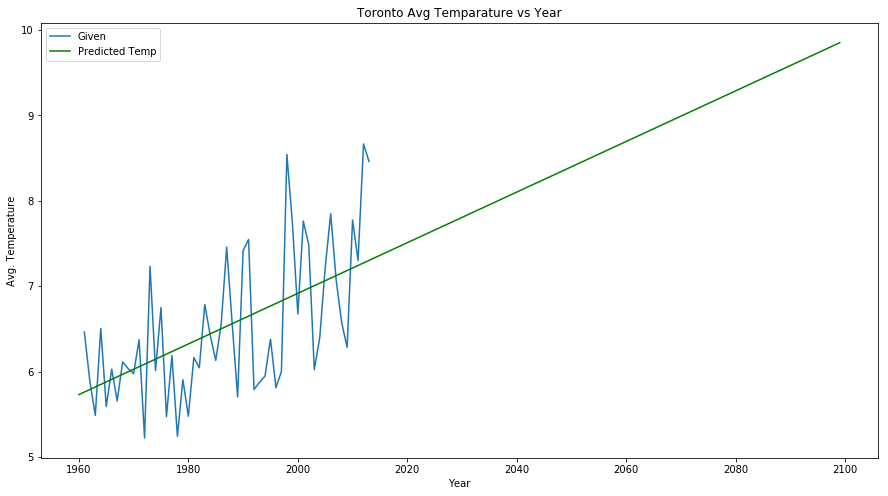

In [142]:
plt.figure(figsize=(15,8))
plt.plot(b_filtered['year'],b_filtered['AverageTemperature'],label='Given')
plt.plot(x_tor_line,p_tor[0],color='green',label='Predicted Temp')
plt.title('Toronto Avg Temparature vs Year')
plt.xlabel('Year')
plt.ylabel('Avg. Temperature')
plt.legend()

It looks like the average temperature is definately increasing in Toronto and Canada as well, although there is a lot of fluctuation.